In [1]:
#Importar las librerías por utlizar
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import skimage
from skimage import io
from skimage.filters import gaussian, median, sobel, sobel_v, sobel_h
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
from skimage.filters import threshold_otsu

#Obtener la direccion de las imagenes
path = os.getcwd()

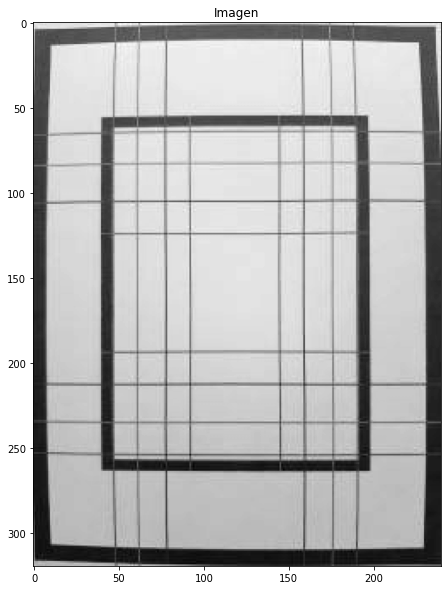

In [2]:
imagen= io.imread(path +r'\Prueba_1.jpeg',True)

plt.figure(figsize=(15,10))
plt.imshow(imagen,cmap='gray')
plt.title("Imagen")
plt.show()

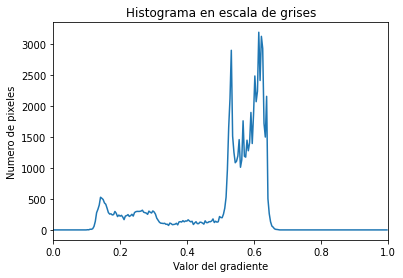

In [3]:
histogram, bin_edges = np.histogram(imagen, bins=256, range=(0, 1))
plt.title("Histograma en escala de grises")
plt.xlabel("Valor del gradiente")
plt.ylabel("Numero de pixeles")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram)
plt.show()

0.4072613250612745


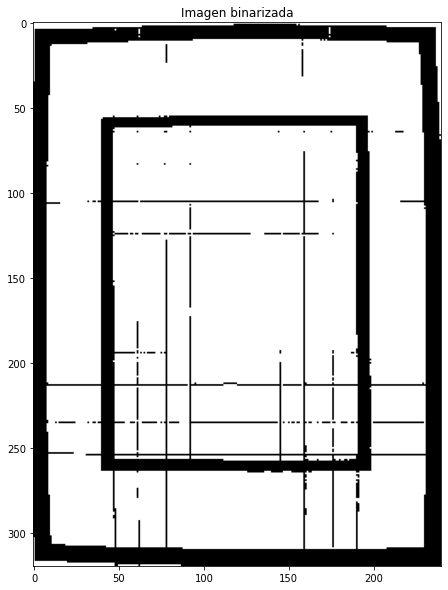

In [4]:
thresh = threshold_otsu(imagen)
print (thresh)
binary = imagen > thresh
plt.figure(figsize=(15,10))
plt.title("Imagen binarizada")
plt.imshow(binary, cmap='gray')
plt.show()

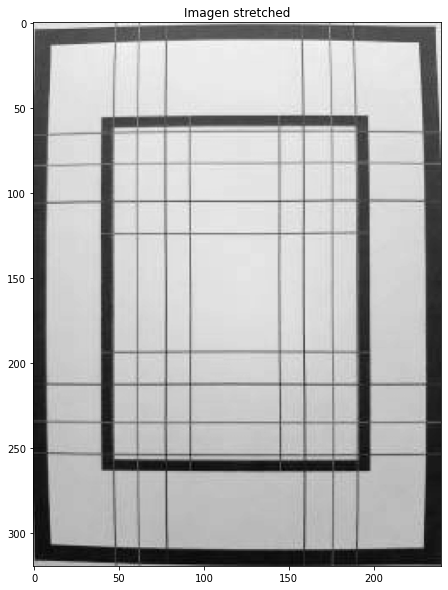

In [5]:
streched = skimage.exposure.rescale_intensity(imagen, in_range=(0.1,0.7), out_range=(0, 1))
plt.figure(figsize=(15,10))
plt.title("Imagen stretched")
plt.imshow(streched, cmap='gray')
plt.show()

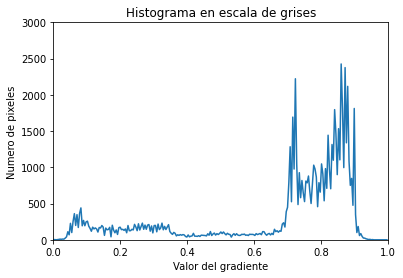

In [6]:
histogram, bin_edges = np.histogram(streched, bins=256, range=(0, 1))
plt.title("Histograma en escala de grises")
plt.xlabel("Valor del gradiente")
plt.ylabel("Numero de pixeles")
plt.ylim([0.0, 3000])
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram)
plt.show()

0.5138141748366014


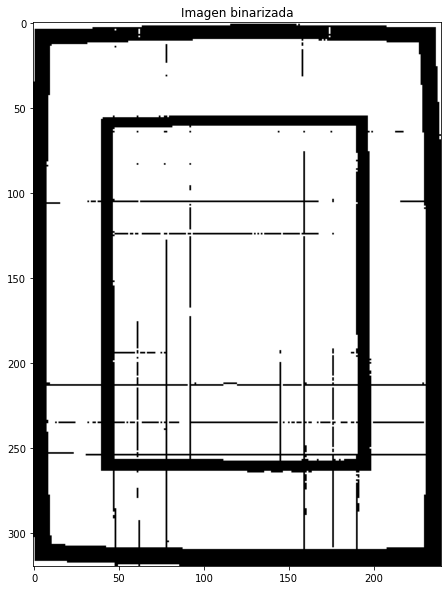

In [7]:
thresh = threshold_otsu(streched)
print (thresh)
binary = streched > thresh
plt.figure(figsize=(15,10))
plt.title("Imagen binarizada")
plt.imshow(binary, cmap='gray')
plt.show()

Idea: ir recorriendo cada columna de izq a derecha hasta encontrar un pixel de negro y luego ir sobre la misma fila de atras para adelante buscando el primer pixel negro, que representa el ultimo pixel negro, y calcular la distancia horizontal entre ellos, es decir el ancho

In [8]:
def dist_pxl(image):
    v,h = image.shape
    c1 = 0
    c2 = 0
    found = False
    for col in range(h):
        for row in range(v):
            if found == False and image[row][col] == True:
                c1 = col
                found = True
                break
        if found == True:
            break
    found = False
    for col in range(1,h):
        for row in range(0,v):
            if found == False and image[row][-col] == True:
                c2 = h-col
                found = True
                break
        if found == True:
            break
    if found == True:
        return c2-c1+1
    else:
        return 0
    
                

In [9]:
m =np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]])
dist_pxl(binary)

240

In [15]:
def size_obj(image,work_dist):
    sensor_size = 4.2
    focal_dist = 3.31
    work_area = work_dist*sensor_size/focal_dist
    print(work_area)
    pxl_dist = dist_pxl(image)
    print(pxl_dist)
    #pxl_dist_max=work_area=240
    width =240*pxl_dist/work_area
    return width

Corregir algunos valores para que los valores sean de ancho

In [16]:
size_obj(binary,108)

137.0392749244713
240


420.3174603174603